<a href="https://colab.research.google.com/github/ellahad/dsc-phase-2-project-v2/blob/main/Analysis%20on%20key%20indicators%20of%20house%20prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALYSIS ON KEY INDICATORS OF HOUSE PRICES


## <small> 1. Research objectives</small>



**Main Objective**

To build a linear Regression Model that predicts House Prices



### <small>a) Specific Objectives</small>

To Identify key features that influence house House prices

To assess the feature with the highest impact on House prices

To evaluate and validate the performance of the model

# **Business Problem**

Real estate is a highly dynamic market influenced by numerous factors.This makes it challenging for real estate investors to accurately predict house prices. Inaccurate pricing models can lead to reduced profitability, missed opportunities, and dissatisfied customers. The current pricing strategy of the real estate company is suboptimal, leading to potential loss of revenue and increased customer dissatisfaction. Hence, the need of a robust predictive pricing model to enable companies stay competitive and adapt to market fluctuations.

Key Challenges:
Difficulty in identifying the most influential features impacting house prices.

Inability to accurately predict house prices based on relevant features.

Limited understanding of the factors driving property value in the current market.

Lack of a data-driven pricing strategy, leading to potential underpricing or overpricing of properties.

**Project Overview**

This project is an attempt to help real estate investors make informed decision on what type of houses they should invest in. This is in terms of the most impactful features, both positively and negatively, on House prices.The key components of the analysis include Data preparation, Feature selection and Engineering, Model Development, Evaluation and Validation.

### <small> Loading the Dataset</small>

In [152]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [153]:
# loading the data set and displaying using pandas
data=pd.read_csv("/content/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503.0


In [154]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8035,7576700131,7/14/2014,850000.0,3,2.25,2220,3707,2.0,NO,NONE,...,8 Good,1620,600.0,1919,0.0,98122,47.6170,-122.286,2030,4850.0
8036,4027701265,5/1/2015,480000.0,3,1.75,2920,21375,1.0,NO,NONE,...,8 Good,1850,1070.0,1961,NaN,98028,47.7666,-122.265,1540,8482.0
8037,3423059177,11/26/2014,420000.0,5,2.75,2540,27007,1.0,NO,NONE,...,8 Good,1520,1020.0,1980,NaN,98058,47.4326,-122.155,1800,26572.0
8038,3876312840,9/12/2014,408000.0,3,1.75,1970,7100,1.0,NO,NONE,...,7 Average,1590,?,1976,0.0,98072,47.7353,-122.172,1790,7455.0
8039,6928600330,8/20/2014,278000.0,5,1.75,2170,9752,1.0,NaN,NONE,...,7 Average,1100,?,1962,0.0,98003,47.3355,-122.331,181,NaN


In [155]:
# checking summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             8040 non-null   int64  
 1   date           8040 non-null   object 
 2   price          8040 non-null   float64
 3   bedrooms       8040 non-null   int64  
 4   bathrooms      8040 non-null   float64
 5   sqft_living    8040 non-null   int64  
 6   sqft_lot       8040 non-null   int64  
 7   floors         8040 non-null   float64
 8   waterfront     7105 non-null   object 
 9   view           8012 non-null   object 
 10  condition      8040 non-null   object 
 11  grade          8040 non-null   object 
 12  sqft_above     8040 non-null   int64  
 13  sqft_basement  8040 non-null   object 
 14  yr_built       8040 non-null   int64  
 15  yr_renovated   6626 non-null   float64
 16  zipcode        8040 non-null   int64  
 17  lat            8040 non-null   float64
 18  long    


# **Data preprocessing**

**Data cleaning**

In [156]:
# checking null values
null= data.isna().sum()
null

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront        935
view               28
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     1414
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          1
dtype: int64

In [157]:
# percentage of missing data
percentage_missing=null*100/len(data)
percentage_missing

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.629353
view              0.348259
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.587065
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.012438
dtype: float64



From the results above one of the variables for our analysis 'view' has some missing data of 0.291707%. We will proceed and first clean that.


In [158]:
data["view"].unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [159]:
# dealing with missing data on 'view' column
# drop the null values for 'view' since it is a small percentage
data.dropna(axis=0, subset=['view'], inplace=True)
data["view"].isnull().sum()

0

In [160]:
# replace null values in column 'waterfront' with place holder 'unknown'
data['waterfront'].fillna('Unknown', inplace=True)
data["waterfront"].isnull().sum()

0

In [161]:
data["yr_renovated"].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975.])

In [162]:
# replace null values in column with place holder'0'
data['yr_renovated'].fillna('0', inplace=True)
data["yr_renovated"].isnull().sum()

0

In [163]:
# checking if all missing data have been cleaned
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       1
dtype: int64

We see that all the missing values have been cleaned

# **Dealing with categorical variables**

**One-hot encoding**



We are going to encode the categorical variables, 'grade', 'view', 'waterfront', 'condition' to numeric


In [164]:
#encoding 'grade' column
data['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [165]:
# getting dummy variables
dummy_grade = pd.get_dummies(data['grade'], prefix='grade')

# Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, dummy_grade], axis=1)

# Dropping the original 'grade' column
data = data.drop('grade', axis=1)
data = data.replace({True: 1, False: 0})

In [166]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Unknown,NONE,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0,0,0,0,0,0,1,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,0,0,0,0,0,0,0,1,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0,0,0,0,0,0,0,0,1,0


In [167]:
#encoding 'view' column
data['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [168]:
# getting dummies
dummy_view = pd.get_dummies(data['view'], prefix='view')

#Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, dummy_view], axis=1)

# Dropping the original 'view' column
data = data.drop('view', axis=1)
data = data.replace({True: 1, False: 0})

In [169]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Unknown,Average,...,0,0,1,0,0,0,0,0,0,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,Average,...,0,0,1,0,0,0,0,0,0,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,Average,...,0,1,0,0,0,0,0,0,0,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,...,0,0,1,0,0,0,0,0,0,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,Average,...,0,0,0,1,0,0,0,0,0,1


In [170]:
#encoding 'waterfront' column
data['waterfront'].unique()

array(['Unknown', 'NO', 'YES'], dtype=object)

In [171]:
# getting dummies
dummy_waterfront = pd.get_dummies(data['waterfront'], prefix='waterfront')

#Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, dummy_waterfront], axis=1)

# Dropping the original 'condition' column
data = data.drop('waterfront', axis=1)

data = data.replace({True: 1, False: 0})

In [172]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,...,grade_8 Good,grade_9 Better,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,waterfront_NO,waterfront_Unknown,waterfront_YES
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Average,1180,...,0,0,0,0,0,0,1,0,1,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,Average,2170,...,0,0,0,0,0,0,1,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,Average,770,...,0,0,0,0,0,0,1,1,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,Very Good,1050,...,0,0,0,0,0,0,1,1,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,Average,1680,...,1,0,0,0,0,0,1,1,0,0


In [173]:
#encoding 'condition' column
data['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [174]:
# getting dummies
dummy_condition = pd.get_dummies(data['condition'], prefix='condition')

#Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, dummy_condition], axis=1)

# Dropping the original 'condition' column
data = data.drop('condition', axis=1)
data = data.replace({True: 1, False: 0})

In [175]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,view_GOOD,view_NONE,waterfront_NO,waterfront_Unknown,waterfront_YES,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,1180,0.0,...,0,1,0,1,0,1,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,2170,400.0,...,0,1,1,0,0,1,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,770,0.0,...,0,1,1,0,0,1,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,1050,910.0,...,0,1,1,0,0,0,0,0,0,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,1680,0.0,...,0,1,1,0,0,1,0,0,0,0


In [176]:
data['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0', '620.0',
       '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0', '450.0',
       '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0',
       '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0', '210.0',
       '1430.0', '1950.0', '440.0', '220.0', '1160.0', '860.0', '580.0',
       '2060.0', '1820.0', '1180.0', '200.0', '1150.0', '1200.0', '680.0',
       '530.0', '1450.0', '1170.0', '1080.0', '960.0', '280.0', '870.0',
       '1100.0', '460.0', '1400.0', '660.0', '1220.0', '900.0', '420.0',
       '1580.0', '1380.0', '475.0', '690.0', '270.0', 

In [177]:
dropping_question_mark = data[data['sqft_basement'] == '?']
data = data.drop(dropping_question_mark.index )

In [178]:
# changing data type of 'sqft_basement' to float
data['sqft_basement'] = data['sqft_basement'].astype('float64')

In [179]:
data.dtypes

id                       int64
date                    object
price                  float64
bedrooms                 int64
bathrooms              float64
sqft_living              int64
sqft_lot                 int64
floors                 float64
sqft_above               int64
sqft_basement          float64
yr_built                 int64
yr_renovated            object
zipcode                  int64
lat                    float64
long                   float64
sqft_living15            int64
sqft_lot15             float64
grade_10 Very Good       uint8
grade_11 Excellent       uint8
grade_12 Luxury          uint8
grade_13 Mansion         uint8
grade_3 Poor             uint8
grade_4 Low              uint8
grade_5 Fair             uint8
grade_6 Low Average      uint8
grade_7 Average          uint8
grade_8 Good             uint8
grade_9 Better           uint8
view_AVERAGE             uint8
view_EXCELLENT           uint8
view_FAIR                uint8
view_GOOD                uint8
view_NON


Exploratory Data Analysis **bold text**

In [180]:
data.shape

(7854, 41)

In [181]:
data.dtypes

id                       int64
date                    object
price                  float64
bedrooms                 int64
bathrooms              float64
sqft_living              int64
sqft_lot                 int64
floors                 float64
sqft_above               int64
sqft_basement          float64
yr_built                 int64
yr_renovated            object
zipcode                  int64
lat                    float64
long                   float64
sqft_living15            int64
sqft_lot15             float64
grade_10 Very Good       uint8
grade_11 Excellent       uint8
grade_12 Luxury          uint8
grade_13 Mansion         uint8
grade_3 Poor             uint8
grade_4 Low              uint8
grade_5 Fair             uint8
grade_6 Low Average      uint8
grade_7 Average          uint8
grade_8 Good             uint8
grade_9 Better           uint8
view_AVERAGE             uint8
view_EXCELLENT           uint8
view_FAIR                uint8
view_GOOD                uint8
view_NON

In [182]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'view_AVERAGE', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD', 'view_NONE', 'waterfront_NO', 'waterfront_Unknown',
       'waterfront_YES', 'condition_Average', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very Good'],
      dtype='object')

In [183]:
data = data.drop(['id', 'date', 'yr_renovated'], axis=1)

**Checking outliers**

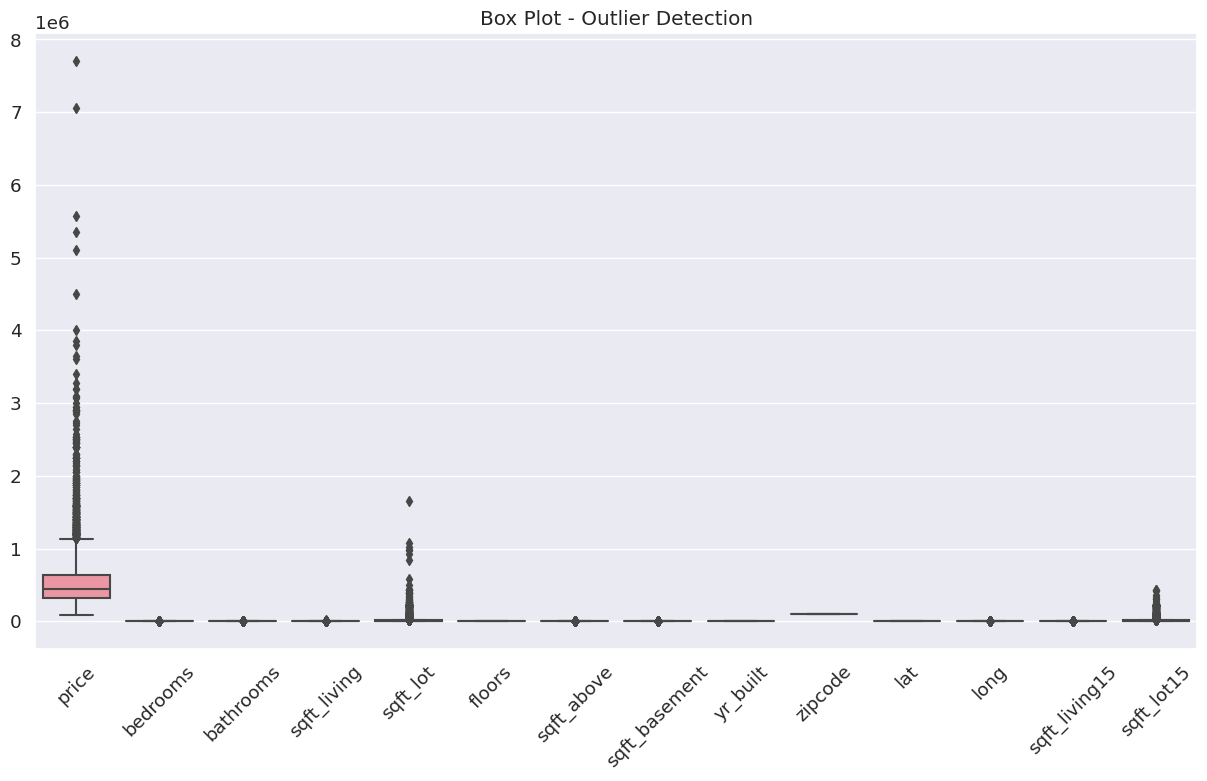

Outliers:
          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
5     1230000.0         4       4.50         5420    101930     1.0   
10     662500.0         3       2.50         3560      9796     1.0   
21    2000000.0         3       2.75         3050     44867     1.0   
31     280000.0         2       1.50         1190      1265     3.0   
63     549000.0         3       1.75         1540      1044     3.0   
...         ...       ...        ...          ...       ...     ...   
7943   401500.0         3       2.50         1509      1114     3.0   
7982  3400000.0         3       4.50         5230     17826     2.0   
7986   342000.0         3       3.00         1260      1634     3.0   
8010   275000.0         3       1.00         1230    171190     1.0   
8023   920000.0         5       4.50         3820      5750     2.0   

      sqft_above  sqft_basement  yr_built  zipcode  ...  view_GOOD  view_NONE  \
5           3890         1530.0      2001    98053  ... 

In [184]:
# Create box plots to visualize outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
        'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']])
plt.title('Box Plot - Outlier Detection')
plt.xticks(rotation=45)
plt.show()

# Calculating z-scores for numerical features
numeric_features =[ 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
        'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
z_scores = data[numeric_features].apply(lambda x: (x - x.mean()) / x.std())

# Identify outliers based on z-score threshold ( z-score > 3 or z-score < -3)
outliers = data[(z_scores > 3).any(axis=1)]

# Print the outliers
print('Outliers:')
print(outliers)

We have outliers in 'price','sqft_lot', 'sqft_lot15'.

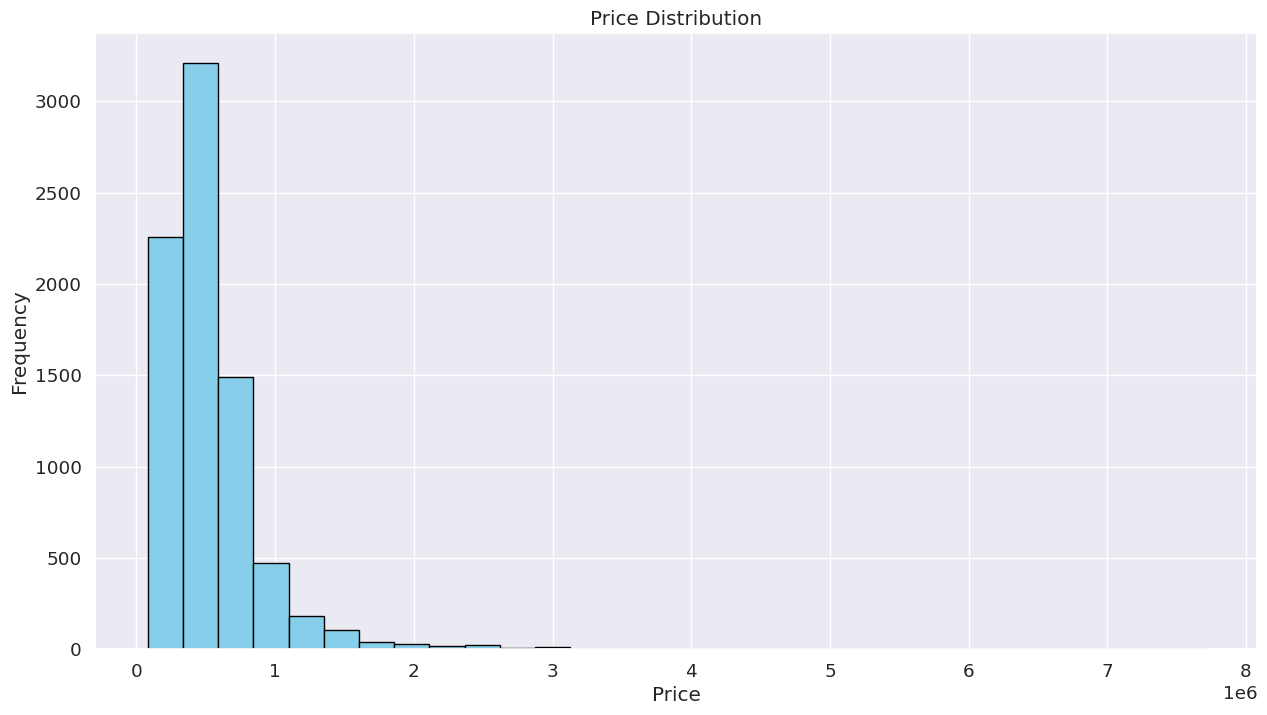

In [185]:
# visualizing price ditribution
plt.figure(figsize=(15, 8))
plt.hist(data['price'], bins= 30, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The outliers in price are important since they are variations in price levels. For 'sqft_lot', 'sqft_lot15' we may need to perform some transformations on them.

In [186]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,...,view_GOOD,view_NONE,waterfront_NO,waterfront_Unknown,waterfront_YES,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
count,7.854000e+03,7854.000000,7854.000000,7854.000000,7.854000e+03,7854.000000,7854.000000,7854.000000,7854.000000,7854.000000,...,7854.000000,7854.000000,7854.000000,7854.000000,7854.000000,7854.000000,7854.000000,7854.000000,7854.000000,7854.000000
mean,5.354089e+05,3.370130,2.064871,2056.388337,1.593559e+04,1.431500,1752.857398,303.530940,1967.359944,98077.888464,...,0.024828,0.899032,0.876369,0.116628,0.007003,0.617774,0.007385,0.287369,0.001528,0.085943
std,3.777374e+05,0.894472,0.762211,910.745920,4.555610e+04,0.509448,810.971813,450.637658,27.971091,53.937476,...,0.155611,0.301305,0.329181,0.320997,0.083395,0.485962,0.085622,0.452564,0.039061,0.280298
min,8.000000e+04,1.000000,0.500000,380.000000,5.720000e+02,1.000000,380.000000,0.000000,1900.000000,98001.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.150000e+05,3.000000,1.500000,1410.000000,5.414250e+03,1.000000,1180.000000,0.000000,1950.000000,98033.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.482500e+05,3.000000,2.000000,1900.000000,7.884000e+03,1.000000,1530.000000,0.000000,1969.000000,98065.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,6.410000e+05,4.000000,2.500000,2500.000000,1.111025e+04,2.000000,2130.000000,600.000000,1990.000000,98118.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,7.700000e+06,9.000000,8.000000,12050.000000,1.651359e+06,3.000000,8570.000000,3480.000000,2015.000000,98199.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Checking correlations and dealing with multicollinearity**

In [187]:
# Correlation matrix to see our variable correlations
correlation_matrix = data.corr()
correlation_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,...,view_GOOD,view_NONE,waterfront_NO,waterfront_Unknown,waterfront_YES,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
price,1.000000,0.303920,0.525496,0.701807,0.085589,0.282275,0.608275,0.323706,0.032865,-0.049622,...,0.200886,-0.354955,-0.062928,-0.017205,0.314620,0.002432,-0.053546,-0.030646,-0.022301,0.064728
bedrooms,0.303920,1.000000,0.534119,0.577562,0.026803,0.230020,0.472381,0.317161,0.162765,-0.144122,...,0.062050,-0.091893,0.009686,-0.011548,0.006219,0.019373,-0.042345,-0.022455,-0.041701,0.021414
bathrooms,0.525496,0.534119,1.000000,0.767885,0.085701,0.498594,0.689683,0.310748,0.480290,-0.196249,...,0.139141,-0.197286,-0.018910,-0.002302,0.083503,0.157709,-0.060512,-0.143939,-0.045031,-0.016265
sqft_living,0.701807,0.577562,0.767885,1.000000,0.157221,0.394650,0.869265,0.456679,0.322562,-0.182175,...,0.177602,-0.269582,-0.031348,-0.000113,0.124175,0.096079,-0.053546,-0.083352,-0.040938,-0.009937
sqft_lot,0.085589,0.026803,0.085701,0.157221,1.000000,0.012831,0.175543,0.001837,0.079817,-0.120740,...,0.071478,-0.043827,-0.005497,-0.001263,0.026560,0.005840,0.006863,0.001123,0.014651,-0.016076
floors,0.282275,0.230020,0.498594,0.394650,0.012831,1.000000,0.575775,-0.238577,0.399778,-0.078176,...,0.038322,-0.041745,-0.004566,-0.006427,0.042764,0.273566,-0.048247,-0.222248,-0.029935,-0.096543
sqft_above,0.608275,0.472381,0.689683,0.869265,0.175543,0.575775,1.000000,-0.042812,0.424959,-0.248081,...,0.097461,-0.149949,-0.030282,0.004540,0.102057,0.186105,-0.049507,-0.137200,-0.034267,-0.081239
sqft_basement,0.323706,0.317161,0.310748,0.456679,0.001837,-0.238577,-0.042812,1.000000,-0.112858,0.078271,...,0.183545,-0.274979,-0.008859,-0.008398,0.067297,-0.140739,-0.019124,0.078451,-0.021069,0.126116
yr_built,0.032865,0.162765,0.480290,0.322562,0.079817,0.399778,0.424959,-0.112858,1.000000,-0.377884,...,-0.014721,0.050820,-0.006147,0.008173,-0.007195,0.334756,-0.049867,-0.202058,-0.051436,-0.231738
zipcode,-0.049622,-0.144122,-0.196249,-0.182175,-0.120740,-0.078176,-0.248081,0.078271,-0.377884,1.000000,...,0.048394,-0.088310,-0.001853,-0.001477,0.012998,0.036889,0.009939,-0.077620,0.003647,0.057824


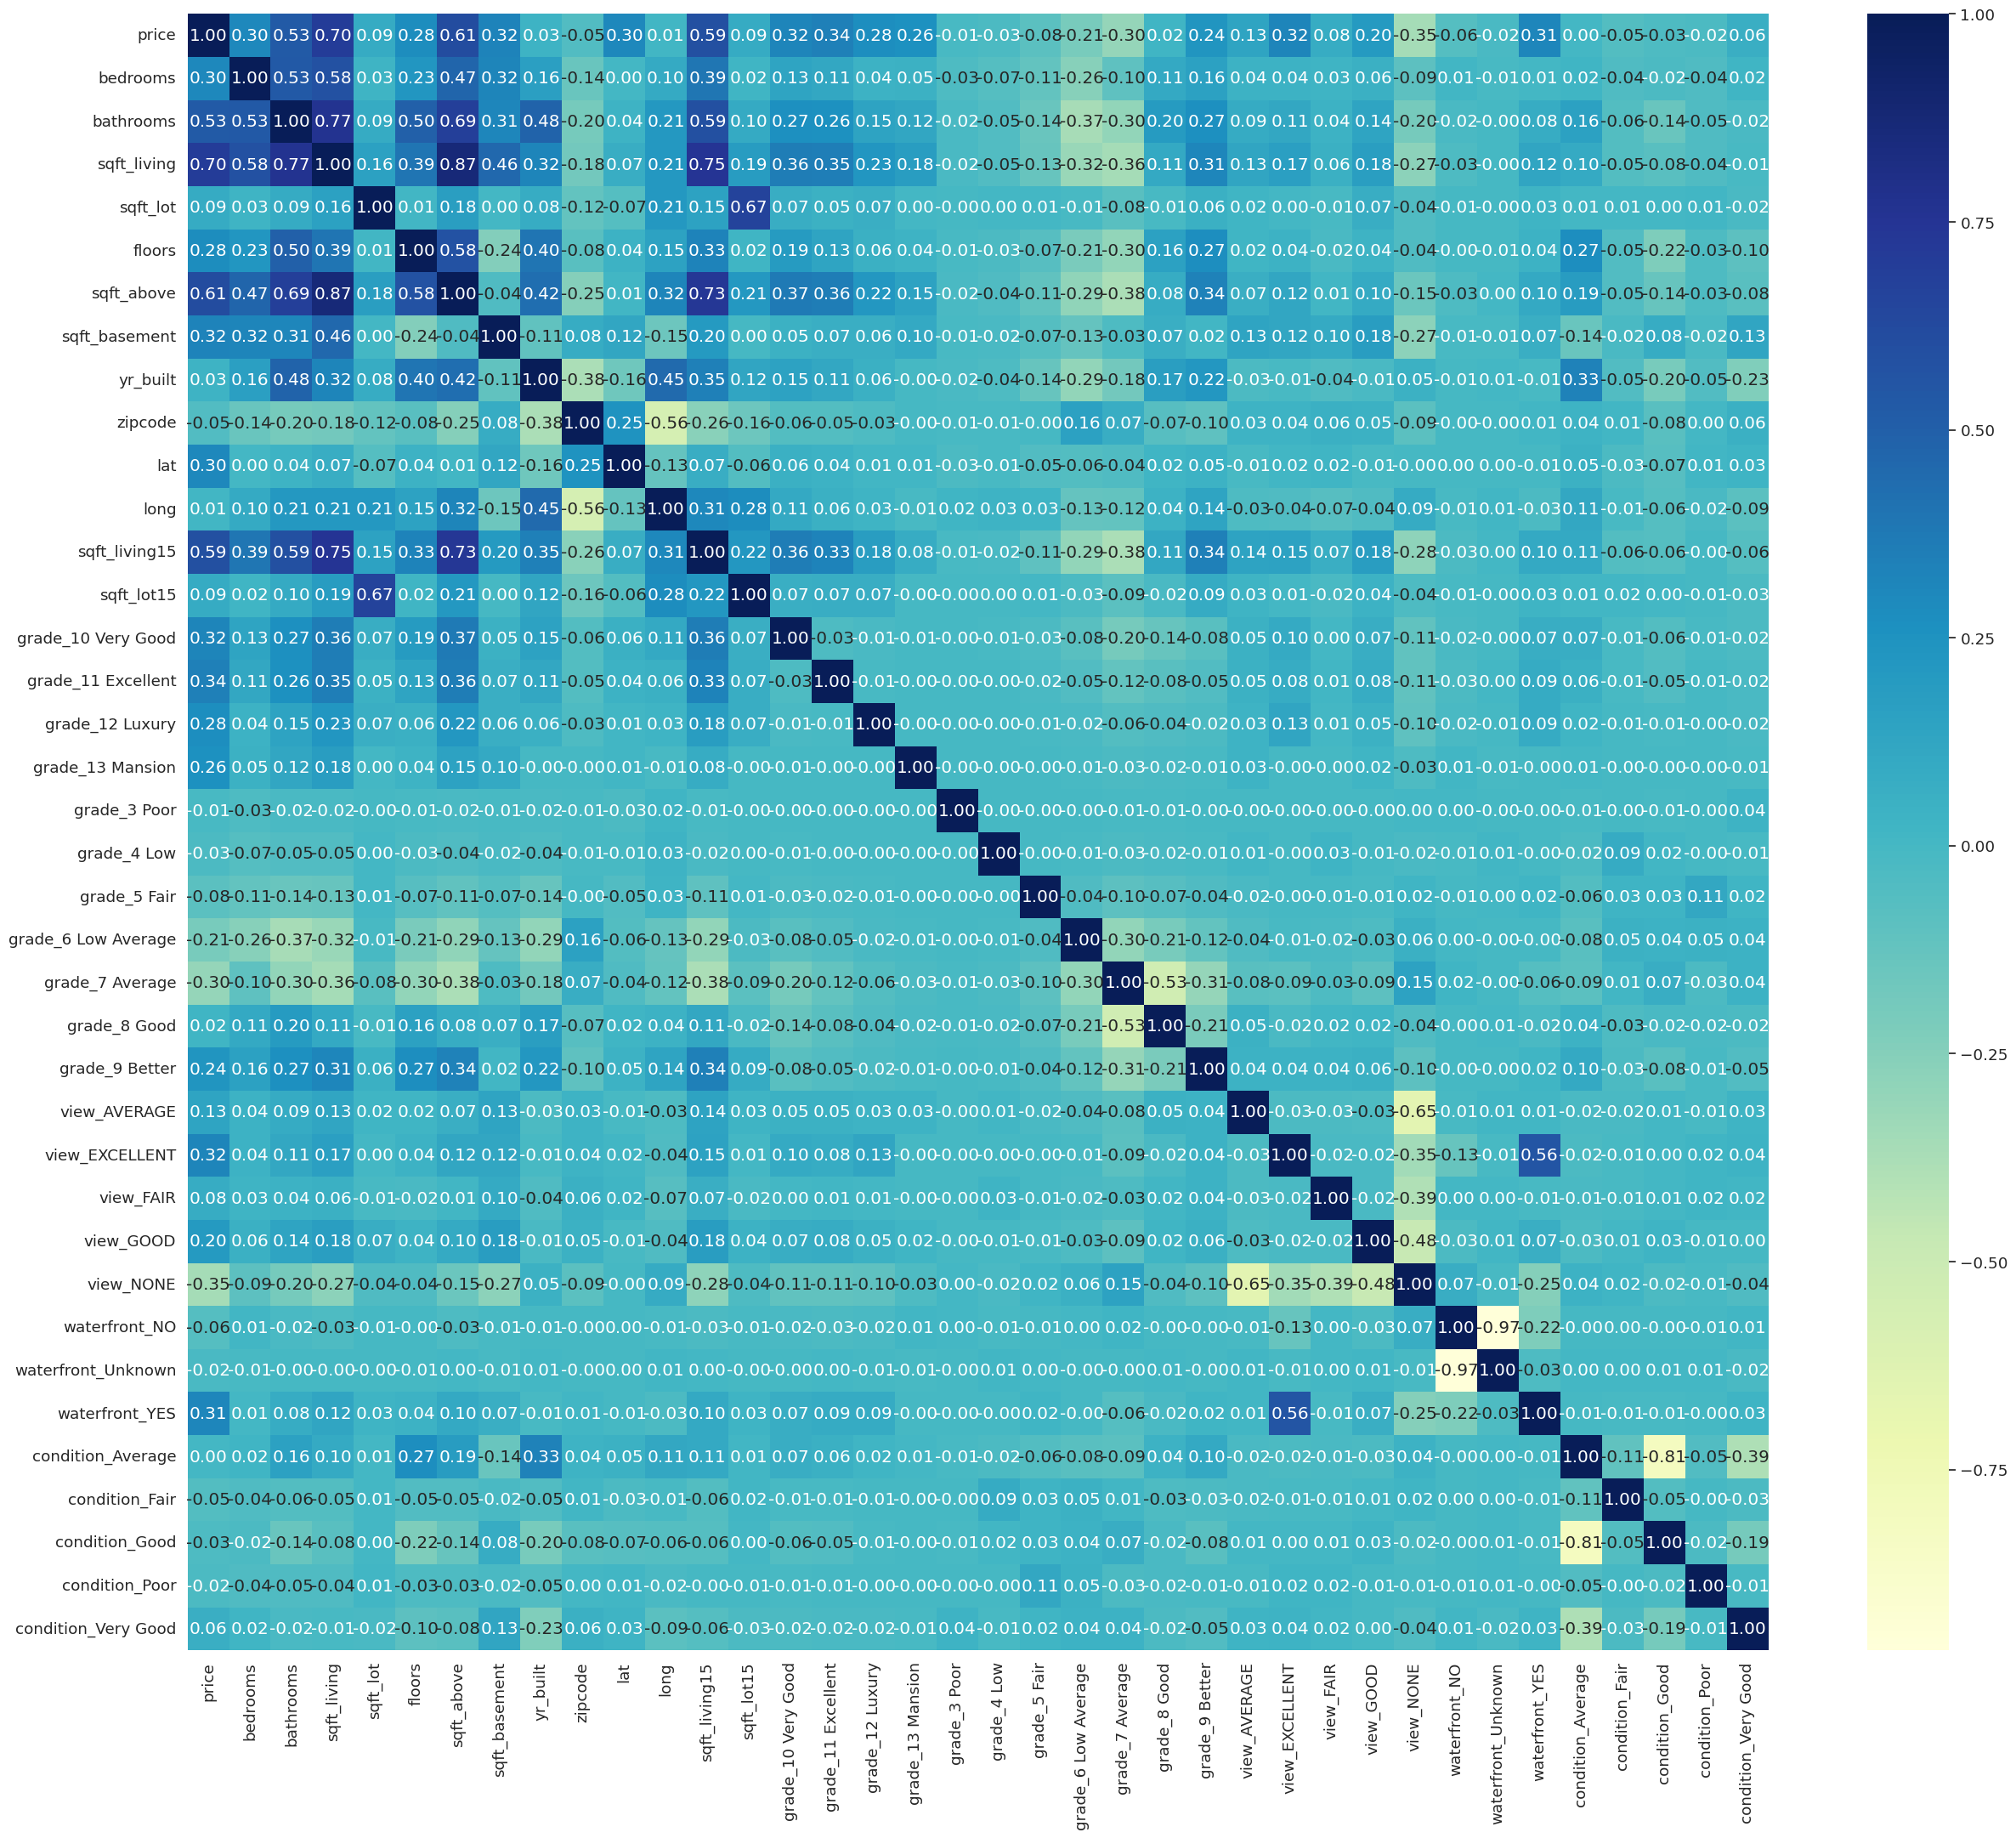

In [188]:
# visualizing the correlations using heatmap
plt.figure(figsize=(30,25))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, fmt="0.2f", cmap="YlGnBu")
plt.show()

**Checking highly correlated pairs**

In [189]:
# checking the highly correlated variables
#getting variables with high correlation, having 0.75 as the threshold
threshold = 0.75

# Finding indices where correlation is greater than the threshold and exclude self-correlation
row, col = np.where((np.abs(correlation_matrix) > threshold) & (np.abs(correlation_matrix) < 1))

# Creating a DataFrame with the pairs of variables and their correlation
high_corr_pairs = pd.DataFrame({
    'First_Variable': correlation_matrix.index[row],
    'Second_variable': correlation_matrix.columns[col],
    'Correlation': correlation_matrix.values[row, col]
})

# Display the pairs with high correlation
high_corr_pairs

,First_Variable,Second_variable,Correlation
0,bathrooms,sqft_living,0.767885
1,sqft_living,bathrooms,0.767885
2,sqft_living,sqft_above,0.869265
3,sqft_living,sqft_living15,0.751767
4,sqft_above,sqft_living,0.869265
5,sqft_living15,sqft_living,0.751767
6,waterfront_NO,waterfront_Unknown,-0.967408
7,waterfront_Unknown,waterfront_NO,-0.967408
8,condition_Average,condition_Good,-0.807315
9,condition_Good,condition_Average,-0.807315


To deal with the multicollinearity, we will drop some values causing the multicollinearity.

In [190]:
# dropping "bathrooms"
data.drop('bathrooms', axis=1, inplace=True)

In [191]:
# dropping "sqft_living15"
data.drop('sqft_living15', axis=1, inplace=True)

In [192]:
# dropping "waterfront_Unknown"
data.drop('waterfront_Unknown', axis=1, inplace=True)

In [193]:
# dropping "condition_Average"
data.drop('condition_Average', axis=1, inplace=True)

In [194]:
# dropping "condition_Good"
data.drop('condition_Good', axis=1, inplace=True)

In [195]:
# dropping "sqft_lot15" which had outlier
data.drop('sqft_lot15', axis=1, inplace=True)

In [196]:
# Checking correlations with price
corr_with_price=data.corr()['price']
corr_with_price

price                  1.000000
bedrooms               0.303920
sqft_living            0.701807
sqft_lot               0.085589
floors                 0.282275
sqft_above             0.608275
sqft_basement          0.323706
yr_built               0.032865
zipcode               -0.049622
lat                    0.300732
long                   0.010586
grade_10 Very Good     0.321343
grade_11 Excellent     0.340682
grade_12 Luxury        0.275089
grade_13 Mansion       0.261760
grade_3 Poor          -0.008168
grade_4 Low           -0.026126
grade_5 Fair          -0.083971
grade_6 Low Average   -0.206239
grade_7 Average       -0.304151
grade_8 Good           0.021175
grade_9 Better         0.237070
view_AVERAGE           0.134694
view_EXCELLENT         0.320138
view_FAIR              0.083307
view_GOOD              0.200886
view_NONE             -0.354955
waterfront_NO         -0.062928
waterfront_YES         0.314620
condition_Fair        -0.053546
condition_Poor        -0.022301
conditio

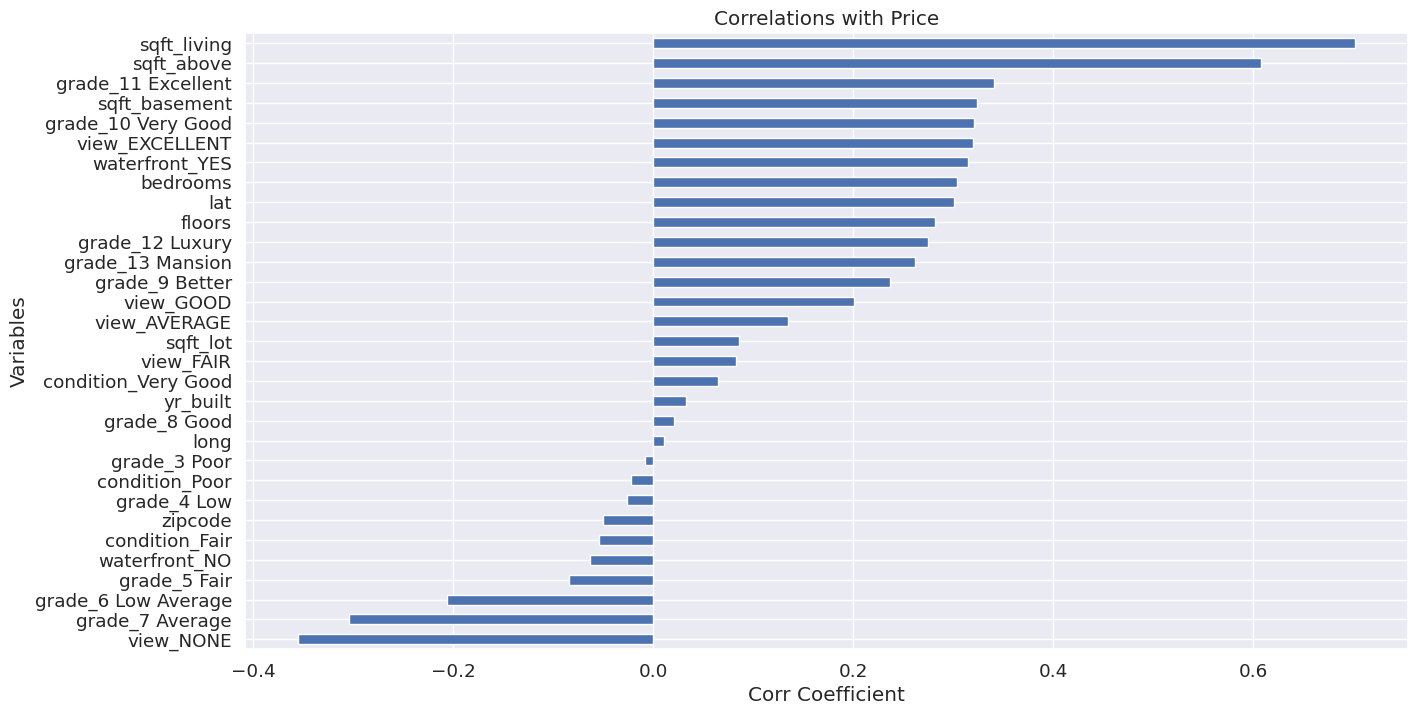

In [197]:
# plotting correlations with price
plt.figure(figsize=(15, 8))
corr_with_price.drop('price').sort_values().plot(kind='barh')
plt.title('Correlations with Price')
plt.xlabel('Corr Coefficient')
plt.ylabel('Variables')
plt.show();

**Checking if the data distributions are normal**

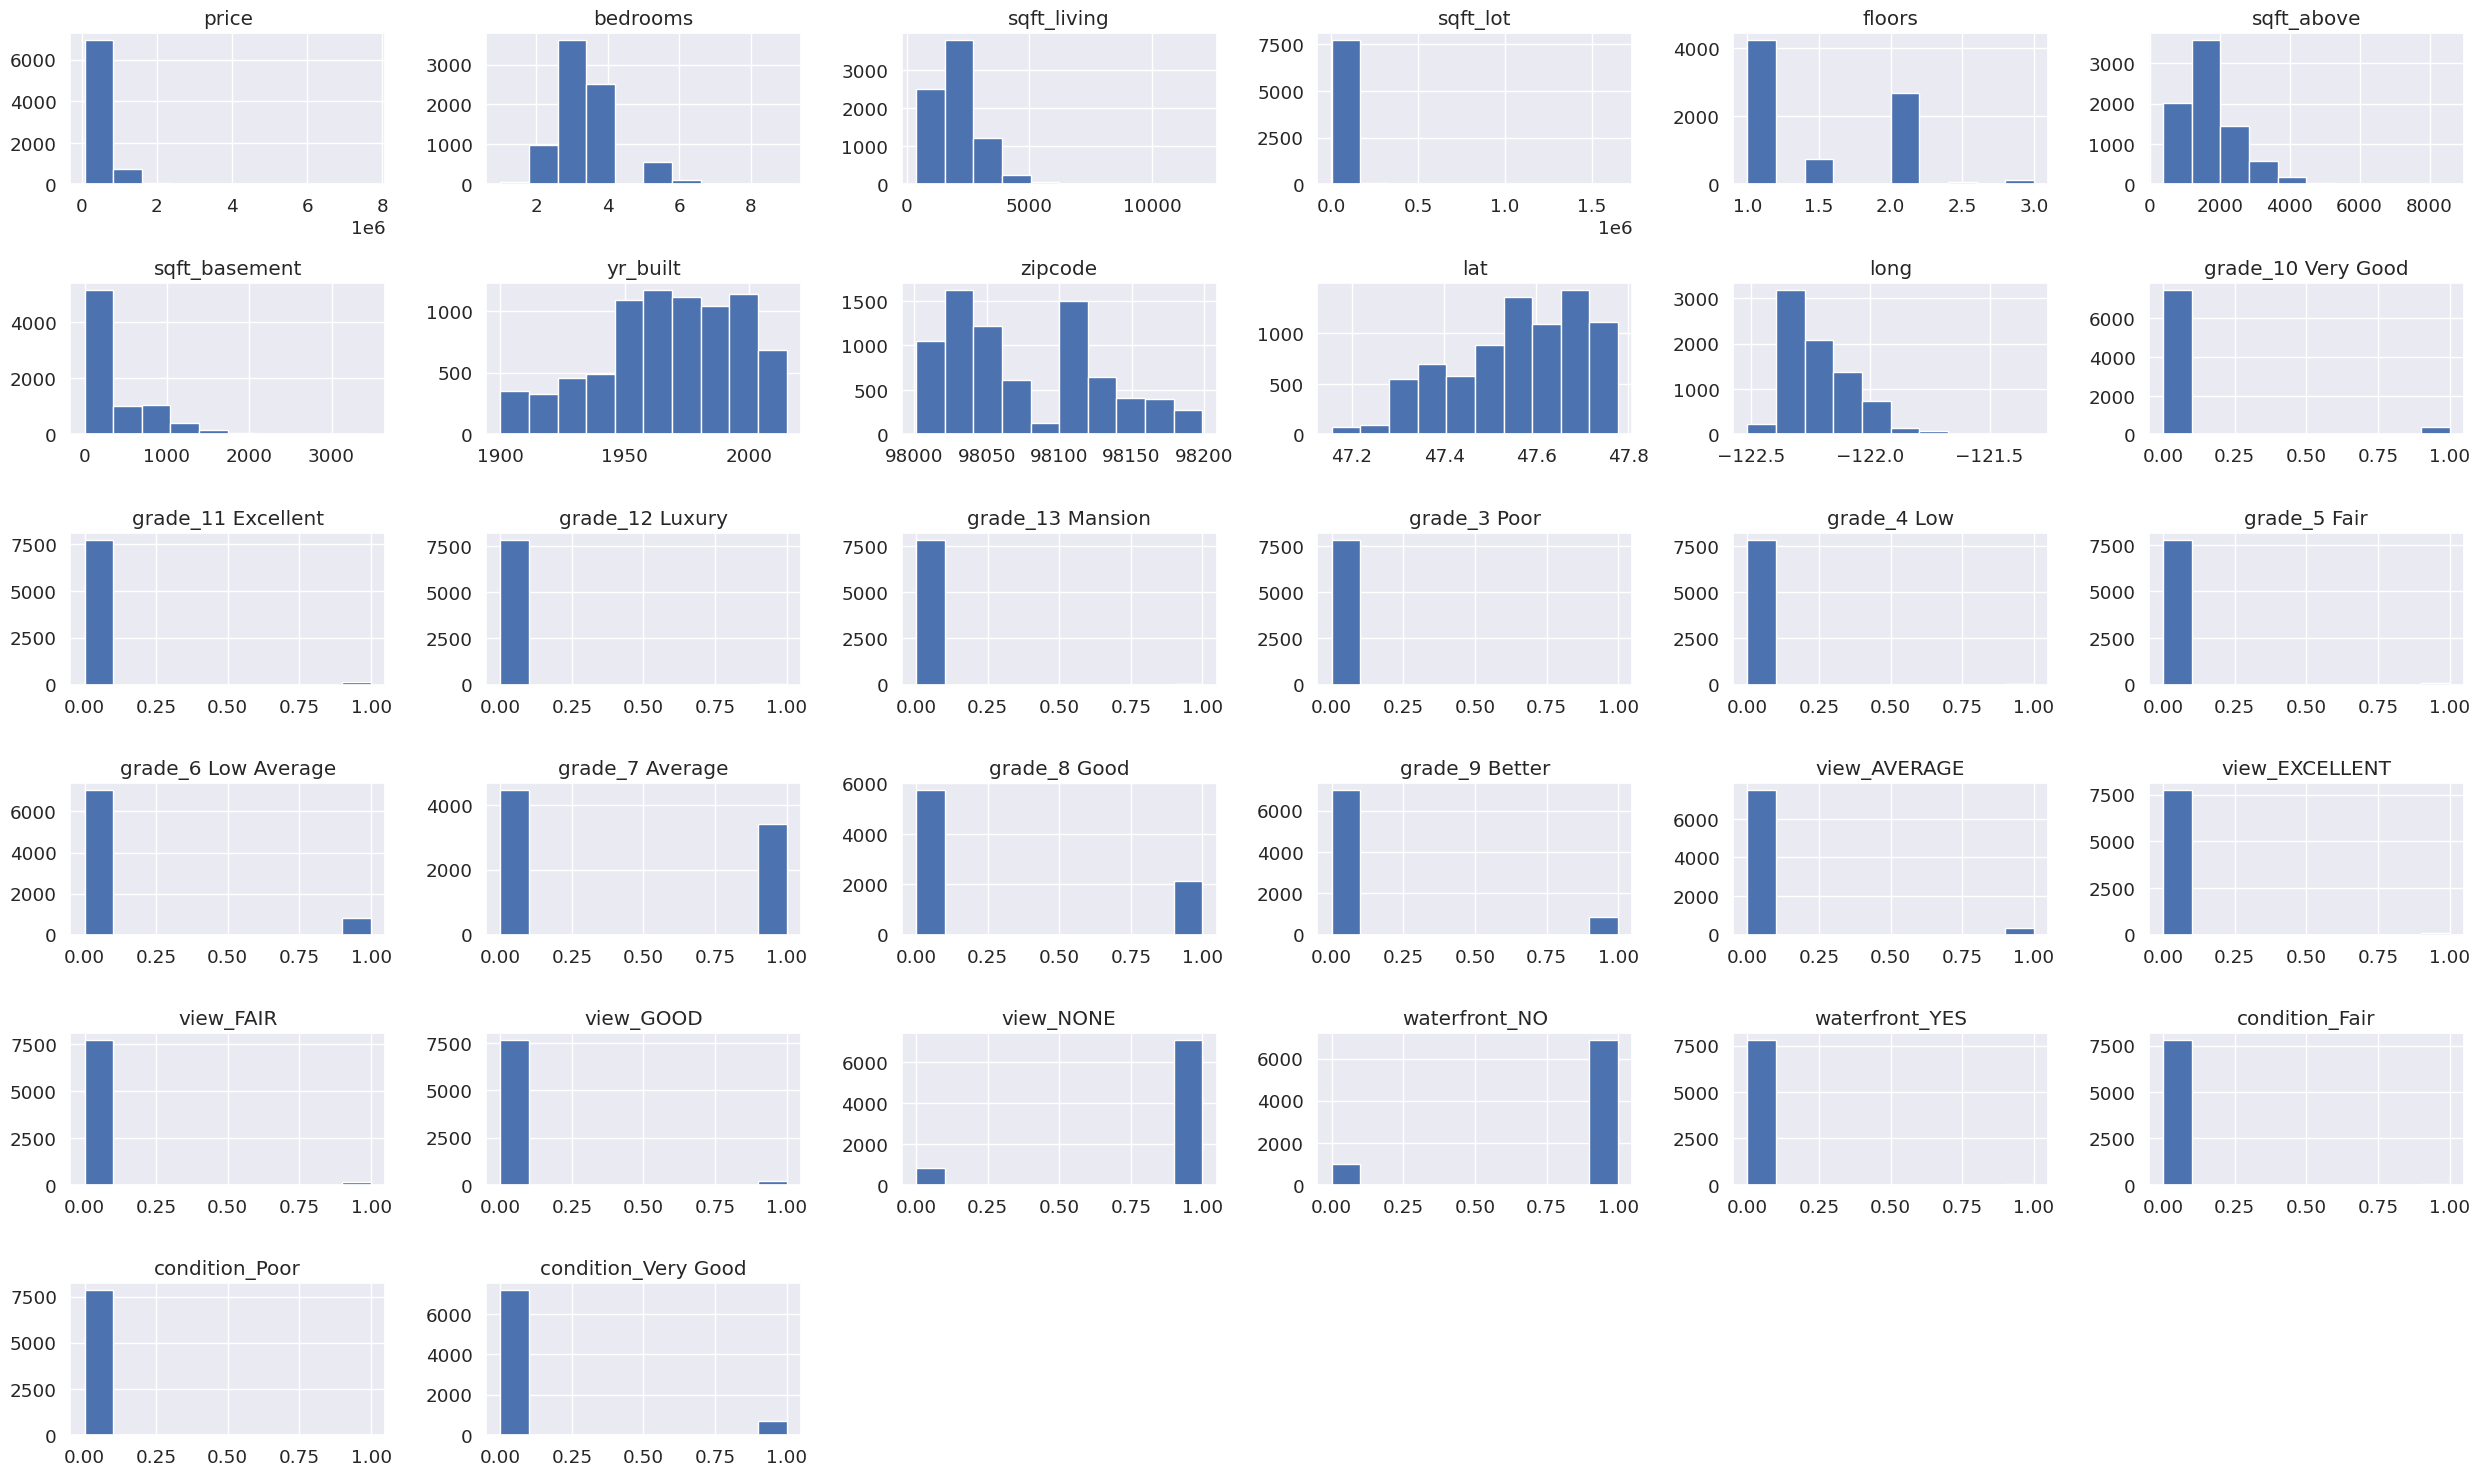

In [198]:
# histogram plot for distributions
data.hist(figsize=(25,15))
plt.tight_layout()
plt.show()



Most variables dont follow a normal ditribution.



# **Building Linear Regression Model**

**Model Iterations**

**Building a baseline model(model1)**

We will use simple linear regression as the baseline model performance.

In [199]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [200]:
data.corr()['price']

price                  1.000000
bedrooms               0.303920
sqft_living            0.701807
sqft_lot               0.085589
floors                 0.282275
sqft_above             0.608275
sqft_basement          0.323706
yr_built               0.032865
zipcode               -0.049622
lat                    0.300732
long                   0.010586
grade_10 Very Good     0.321343
grade_11 Excellent     0.340682
grade_12 Luxury        0.275089
grade_13 Mansion       0.261760
grade_3 Poor          -0.008168
grade_4 Low           -0.026126
grade_5 Fair          -0.083971
grade_6 Low Average   -0.206239
grade_7 Average       -0.304151
grade_8 Good           0.021175
grade_9 Better         0.237070
view_AVERAGE           0.134694
view_EXCELLENT         0.320138
view_FAIR              0.083307
view_GOOD              0.200886
view_NONE             -0.354955
waterfront_NO         -0.062928
waterfront_YES         0.314620
condition_Fair        -0.053546
condition_Poor        -0.022301
conditio

For our baseline model we will use the feature 'sqft_living' since it is the most highly correlated with price.

In [201]:
# Selecting the dependent and independent variable
X_baseline = data[['sqft_living']]
y = data['price']
# adding a constant for the intercept
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
#fit the model
baseline_results = baseline_model.fit()
#make predictions
y_pred_baseline =baseline_results.predict(sm.add_constant(X_baseline))
# calculate rmse
baseline_rmse = np.sqrt(mean_squared_error(y, y_pred_baseline))
# displaying results

print(baseline_results.summary())

print(" RMSE for the baseline model:", baseline_rmse)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     7621.
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:17:57   Log-Likelihood:            -1.0934e+05
No. Observations:                7854   AIC:                         2.187e+05
Df Residuals:                    7852   BIC:                         2.187e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.316e+04   7498.929     -8.423      



From the first model we note that the R squared is 0.493 to mean that 49.3% of variations in price are explained by square foot living.

The F statistic is 0.00 indicating that the overall model is significant.

The Model RSME is 269070.3681078416.

We had earlier noted that most variables did not follow a normal distribution 'price' being one of them. We will therefore log transform price to see if the model improves.


**Model 2**

Here we are inspecting how the model performs with only the 'price' transformed.

In [202]:
# Selecting the dependent and independent variable
X_baseline = data[['sqft_living']]
y = np.log(data['price']+1)
# adding a constant for the intercept
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
#fit the model
baseline_results = baseline_model.fit()
#make predictions
y_pred_baseline =baseline_results.predict(sm.add_constant(X_baseline))
# calculate rmse
baseline_rmse = np.sqrt(mean_squared_error(y, y_pred_baseline))
# displaying results

print(baseline_results.summary())

print(" RMSE for the baseline model:", baseline_rmse)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     7140.
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:17:57   Log-Likelihood:                -3622.1
No. Observations:                7854   AIC:                             7248.
Df Residuals:                    7852   BIC:                             7262.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2095      0.011   1141.608      

The square foot of living now explains 48.3% ( R squared) of variations in price. We also still have an error 'The condition number is large, 5.55e+03. This might indicate that there are strong multicollinearity or other numerical problems.' We will then explore how the model performs after transforming both the feature and target variable.

**Model 3**

Here we have both 'sqft_living ' and 'price transformed'

In [203]:
# Selecting the dependent and independent variable
X = np.log(data[['sqft_living']])
y = np.log(data['price']+1)
# adding a constant for the intercept
model = sm.OLS(y, sm.add_constant(X))
#fit the model
results = model.fit()
#make predictions
y_pred = results.predict(sm.add_constant(X))
# calculate rmse
rmse = np.sqrt(mean_squared_error(y, y_pred))
# displaying results

print(results.summary())

print(" RMSE for the baseline model:", rmse)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     6393.
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:17:57   Log-Likelihood:                -3822.7
No. Observations:                7854   AIC:                             7649.
Df Residuals:                    7852   BIC:                             7663.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.6906      0.079     84.174      



For the transformed variables, the target variable(price ) is now explained by 45.5%(R squared) in price. We also note that the error we were getting that (there is a possiblity of strong multicollinearity or other numeric problems) has been resolved.

In the next model we will try transform multiple features that do not follow a normal distribution and add them to our model. Then inspect how our model performs.


**Before log transformation**

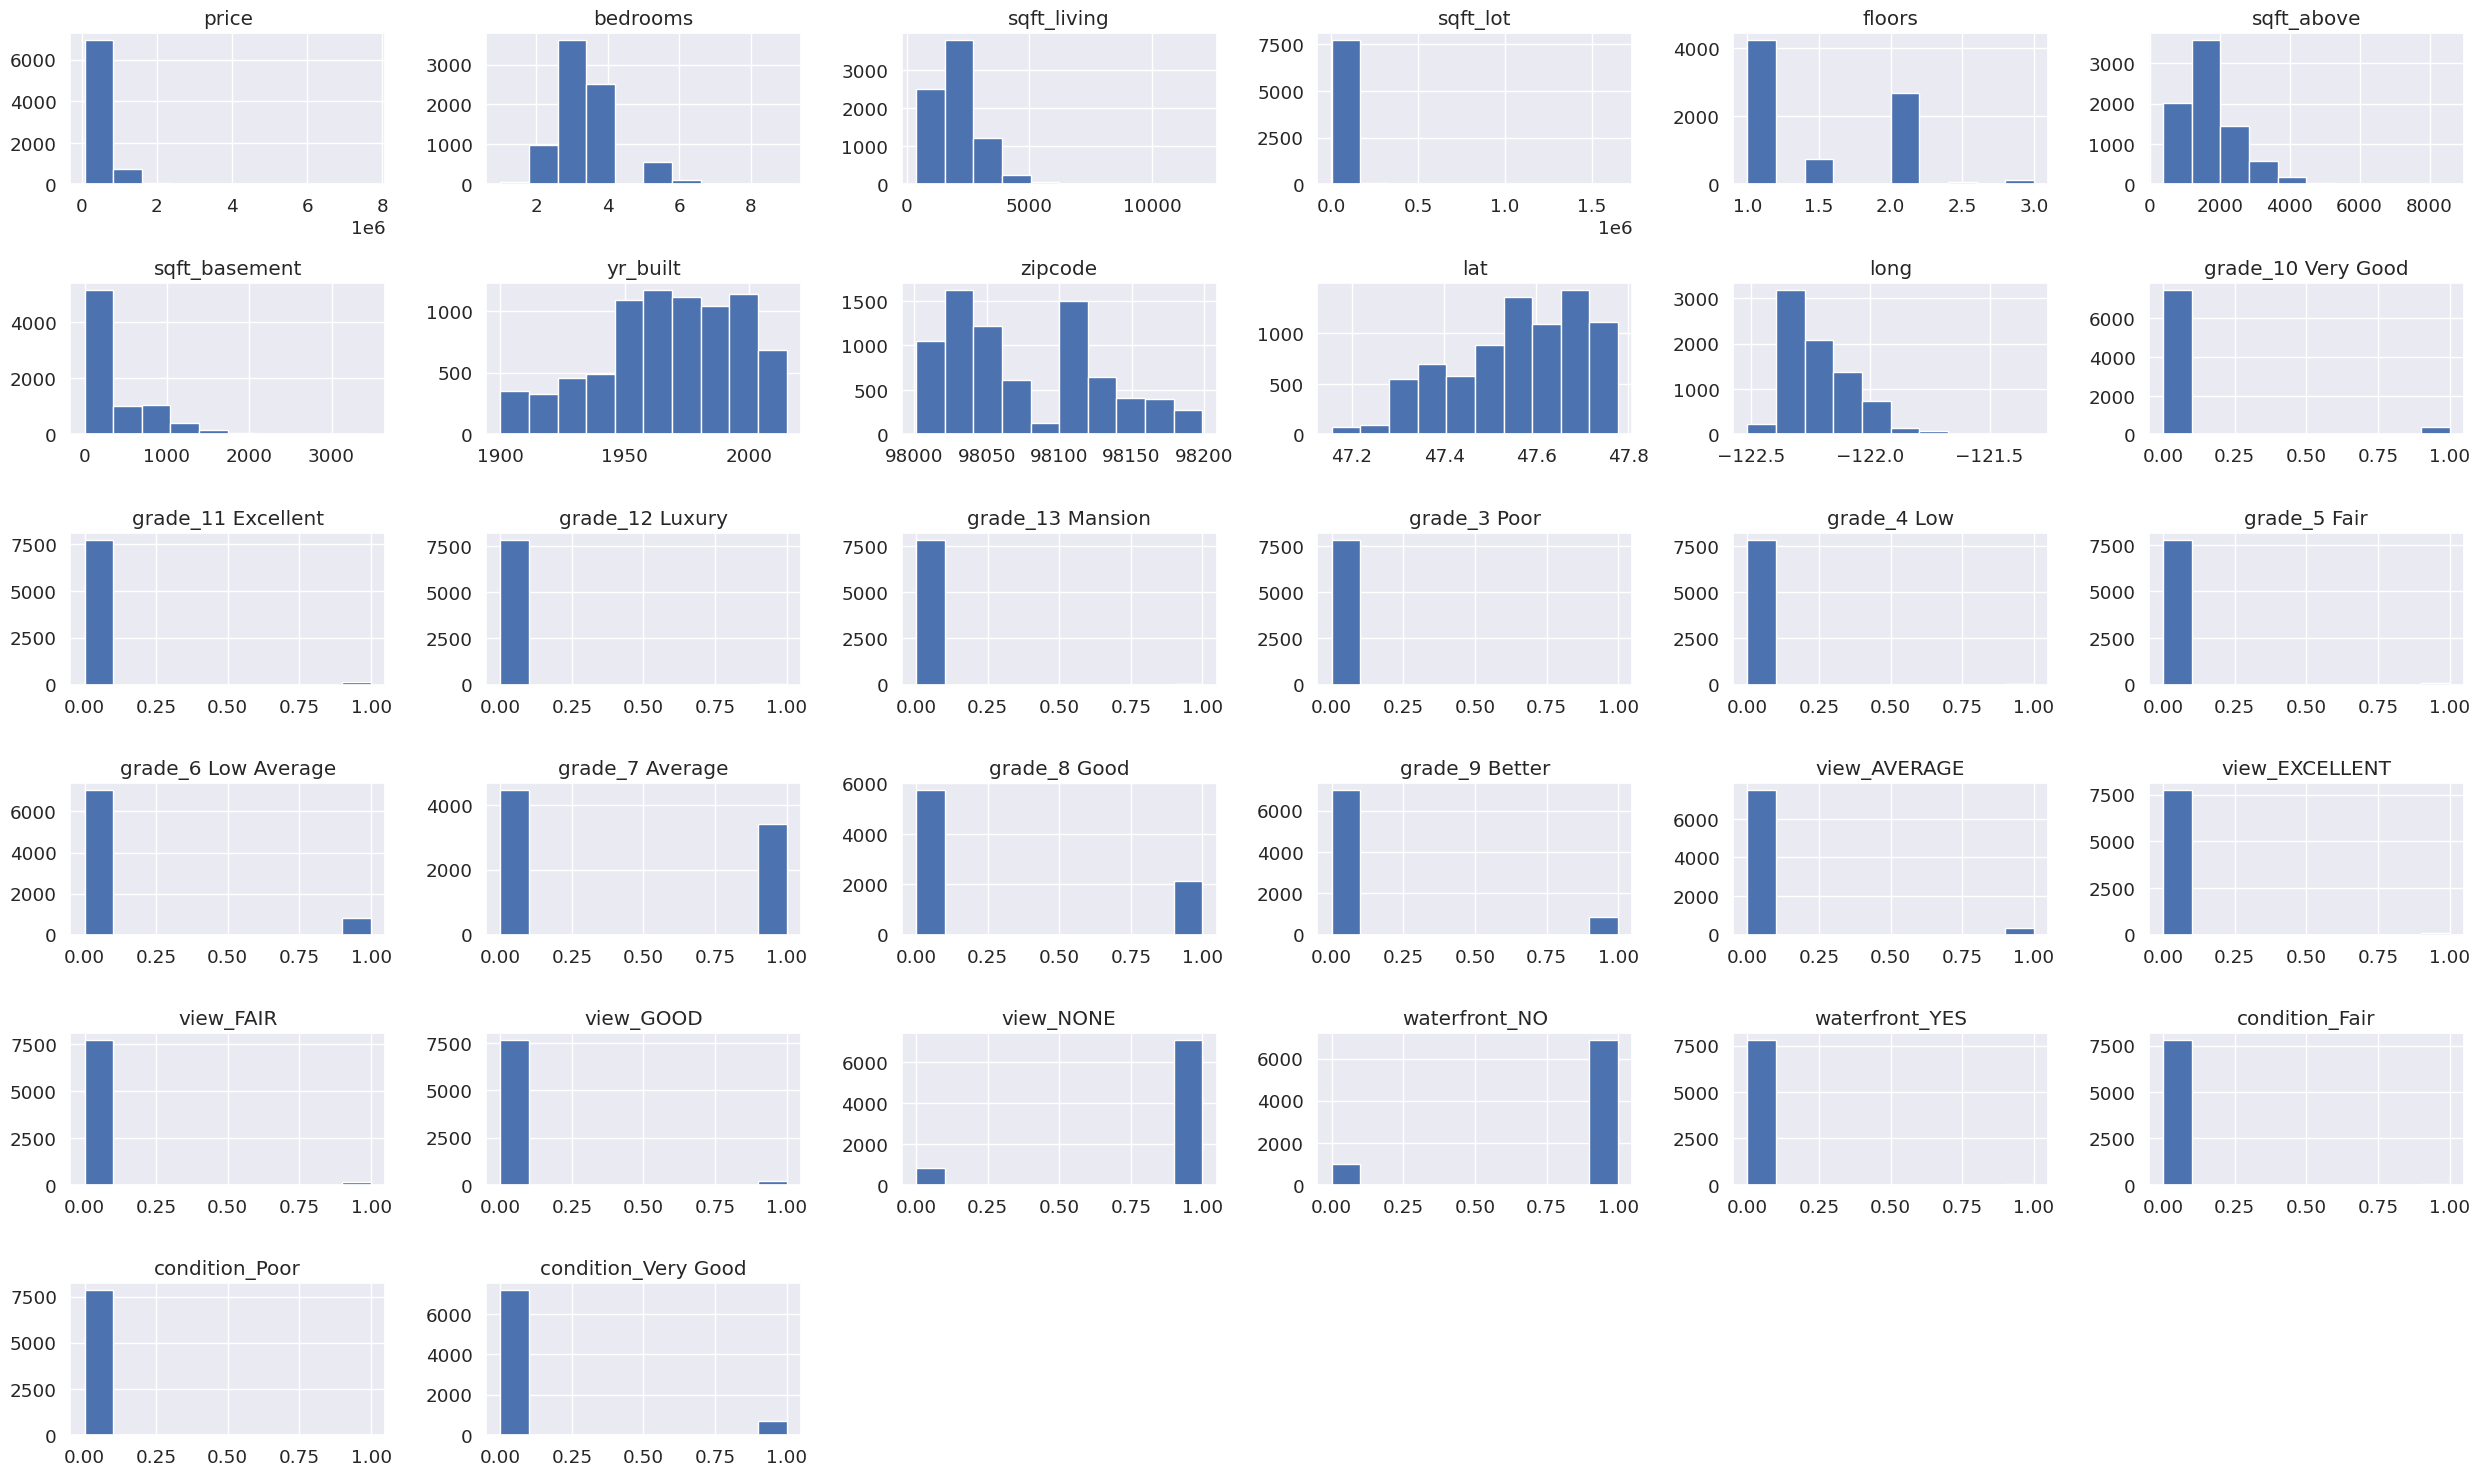

In [204]:
# histogram plot for distributions
data.hist(figsize=(25,15))
plt.tight_layout()
plt.show()

**After log transformation**

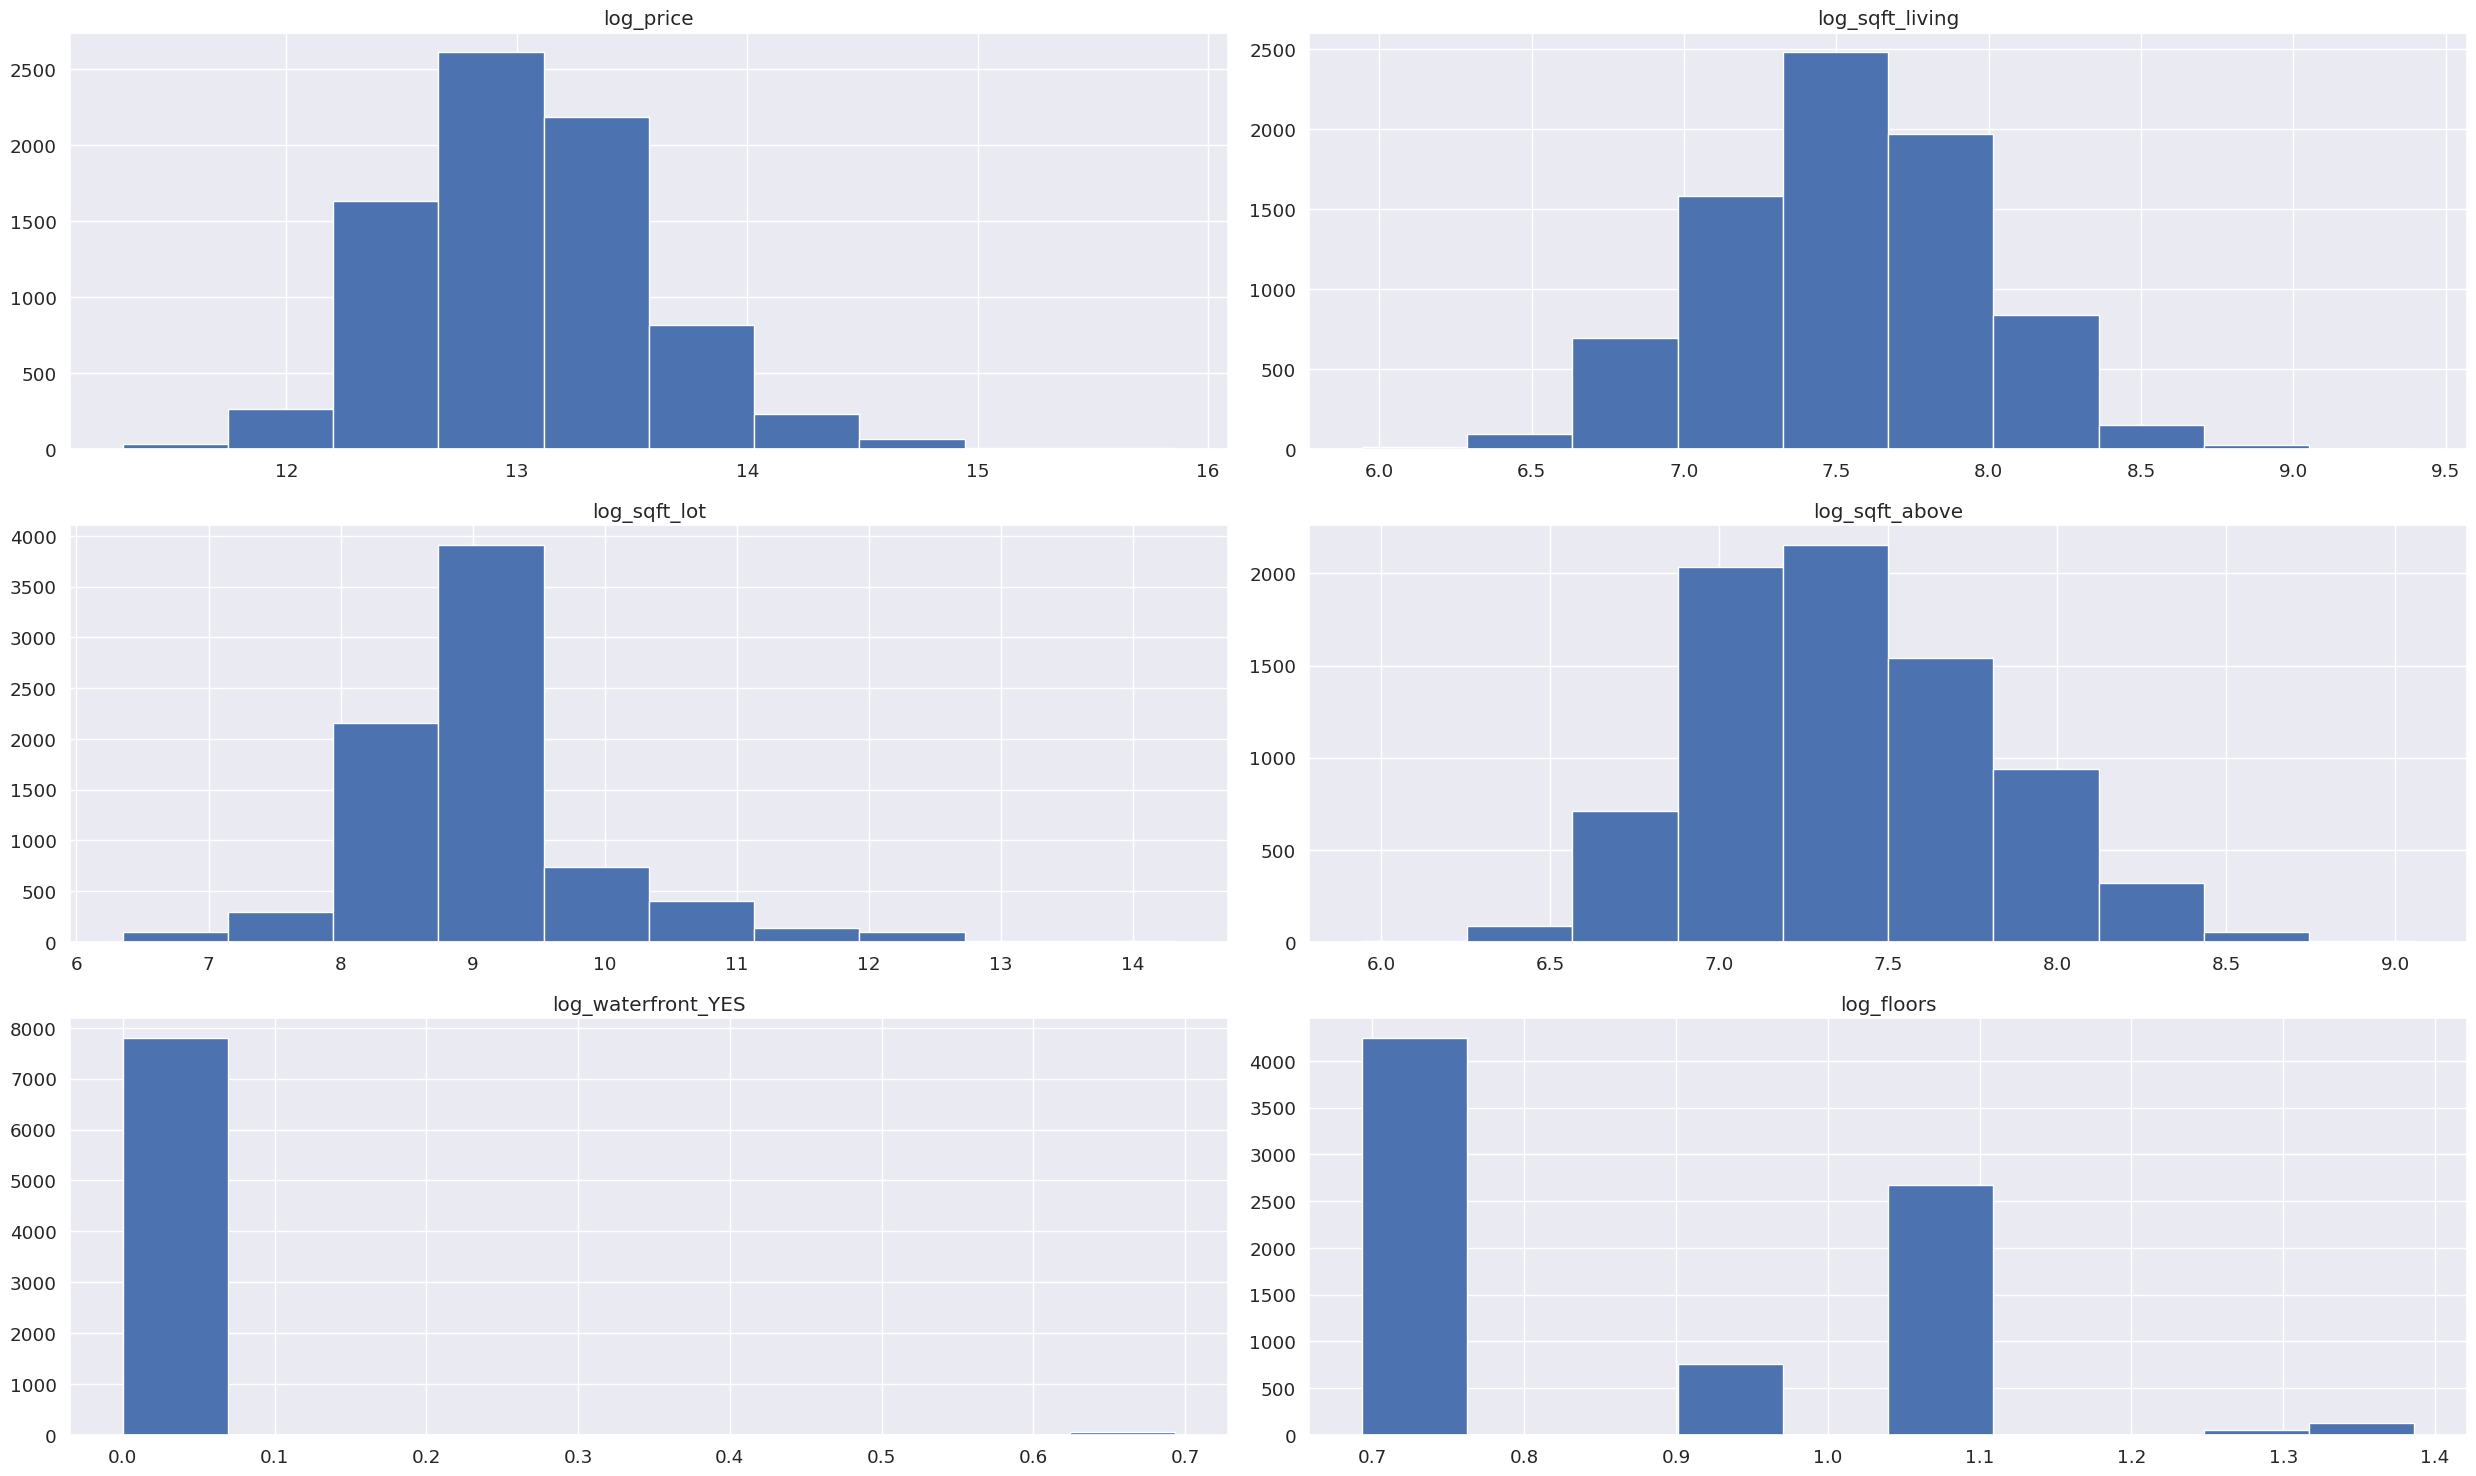

In [205]:
# log transformation to normalize the variables and rename them
data["log_price"]=np.log(data["price"]+1)
data["log_sqft_living"]=np.log(data["sqft_living"]+1)
data["log_sqft_lot"]=np.log(data["sqft_lot"]+1)
data["log_sqft_above"]=np.log(data["sqft_above"]+1)
data["log_waterfront_YES"]=np.log(data["waterfront_YES"]+1)
data["log_floors"]=np.log(data["floors"]+1)
# checking the transformed
plot_data=data[["log_price",'log_sqft_living' ,'log_sqft_lot', 'log_sqft_above', 'log_waterfront_YES', 'log_floors']]
plot_data.hist(figsize=(25,15))
plt.tight_layout()
plt.show()

**Model 4**

In [206]:
# Selecting  independent and dependent variables and using some transformed variables
X = data[['log_sqft_living', 'waterfront_YES', 'view_EXCELLENT', 'condition_Very Good','grade_7 Average',
        'grade_9 Better','grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'log_sqft_above', 'log_sqft_lot']]

y = data['log_price']


# Adding a constant term for the intercept in the multiple regression model
model=sm.OLS(y, sm.add_constant(X))

# Fitting the multiple regression model
results = model.fit()
#making predictions
y_pred=results.predict(sm.add_constant(X))
#calculating rsme
rmse=np.sqrt(mean_squared_error(y, y_pred))

# Display the summary of the regression and rmse
print(results.summary())
print(" RMSE for the baseline model:", rmse)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     809.7
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:18:10   Log-Likelihood:                -2996.1
No. Observations:                7854   AIC:                             6018.
Df Residuals:                    7841   BIC:                             6109.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.0245    

With transforming and additional features R squared and adjusted R squared have now increased to 56.1%. Meaning that 56.1% of variations in price are now explained by The F statistic probability is 0.00 to mean that the model overall is significant. RSME is also now at 0.35435293815870134 which is less than what we had in the log transformed baseline model which we found rmse as 0.393681692154797.This means that our model accuracy has improved.

**Checking Regression Assumptions**

We are going to check if the Regression model has passed the assumptions before doing interpretation of the results.

We will inspect **Linearity, Independence, Normality and Equal Variance**

**Linearity**

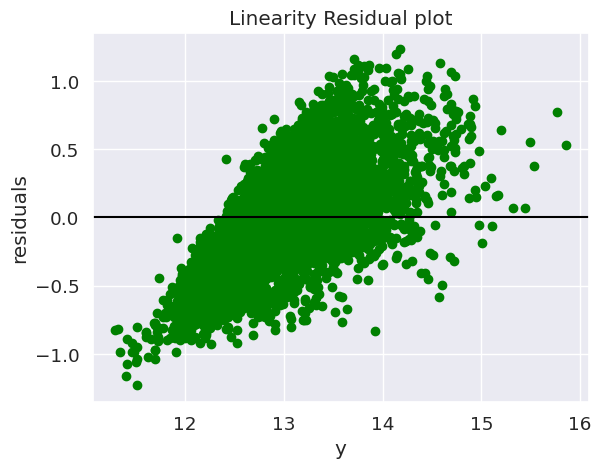

In [207]:
# plotting model results
fig, ax=plt.subplots()
ax.scatter(y, results.resid, color='green')
ax.axhline(y=0, color='black')
ax.set_xlabel('y')
ax.set_ylabel('residuals')
ax.set_title('Linearity Residual plot');

The points form a curvature to mean that the linearity assumption is met.

**Rainbow stat-test for linearity**

In [208]:
# performing a rainbow test to test linearity statistically
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(results)

(0.9155601254244069, 0.9971217000172341)

The p value is close to 1.This high p-value indicates that there is not enough evidence to reject the null hypothesis of linearity. Therefore, based on this test, the assumption of linearity is considered to be met.

**Independence**

The Durbin-Watson statistic is around 1.976 which suggests little to no autocorrelation in the residuals.

**The Normality Assumption**

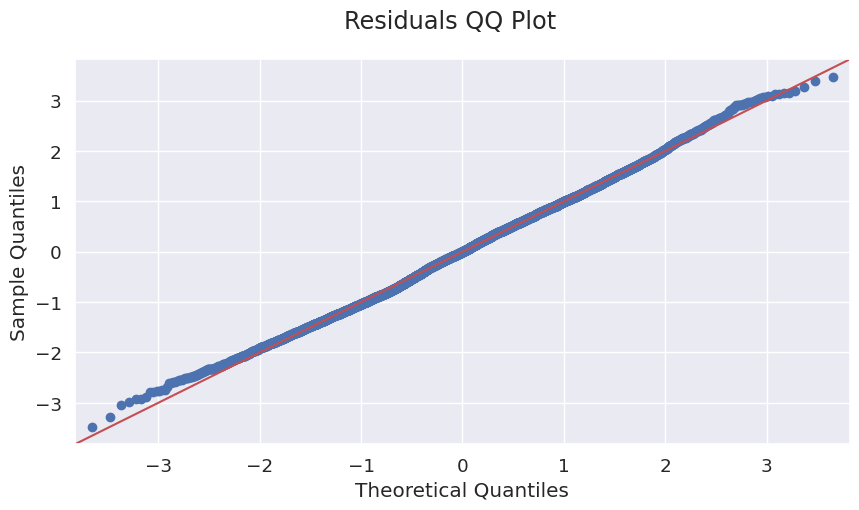

In [209]:
import scipy.stats as stats
residuals = results.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot')
fig.set_size_inches(10, 5)
plt.show()

**The Homoscedasticity Assumption(Equal Variance)**

Text(0, 0.5, 'Residuals')

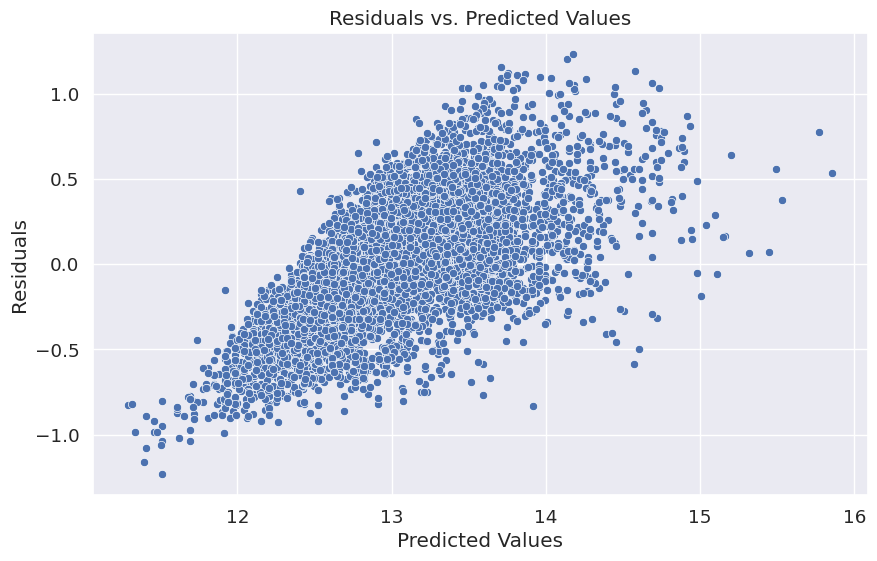

In [210]:
# scatter plot to check homoscedasticity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['log_price'], y=results.resid)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

Fom the scatter plot we observe that there is little to no heteroscedasticity in the residuals.

**Interpretation of results**

**Baseline Model**: R-squared: 0.492 Adjusted R-squared: 0.493 RMSE: 269070.36

**Model 2 (log-transformed price)**: R-squared: 0.476 Adjusted R-squared: 0.476 RMSE: 0.3837

**Model 3 (log-transformed price and sqft_living)**: R-squared: 0.449 Adjusted R-squared: 0.449 RMSE: 0.3936

**Model 4 (multiple features and log-transformed price)**: R-squared: 0.553 Adjusted R-squared: 0.553 RMSE: 0.3544

**Analysis Interpretation**: The R-squared values provide a measure of how well the models explains the variations in the target variable (price). As we progress from the baseline to the 4th model, the R-squared increases, indicating better explanatory power.

The RMSE values for the log-transformed models (Model 2 and Model 3), the RMSE is significantly lower than the baseline, indicating better predictive performance.

Model 4, which includes multiple features, the R-squared further improves, and the RMSE decreases compared to the log-transformed models. This suggests that the inclusion of additional features has enhanced the model's ability to predict prices.

***Interpretation:***

Model 4 with multiple features and log-transformed price performs better than the baseline model, both in terms of explanatory power and predictive accuracy. The probability F statistic being 0.00 means that the model overall is significant. Th P values for our coefficients all being 0.00 means that the coefficients as well are significant for our test.

**Interpreting coefficients**

**grade_13 Mansion (Coefficient: 1.3014):** A one-unit increase in the presence of the "Mansion" grade is associated with an estimated increase of approximately 1.3014 units in the log of house prices. This variable has the highest positive coefficient.

**grade_12 Luxury (Coefficient: 0.8387):** one-unit increase in the presence of the "Luxury" grade is associated with an estimated increase of approximately 0.8387 units in the log of house prices. The "Luxury" grade has the second-highest positive coefficient.

**grade_11 Excellent (Coefficient: 0.6381)**: A one-unit increase in the presence of the "Excellent" grade is associated with an estimated increase of approximately 0.6381 units in the log of house prices. Houses with an "Excellent" grade have the third-highest positive coefficient.

**log_sqft_living (Coefficient: 0.6827):** A one-unit increase in the logarithm of square footage living area is associated with an estimated increase of approximately 0.6827 units in the log of house prices. The logarithm of square footage living area has a positive impact.

**grade_10 Very Good (Coefficient: 0.4626):** A one-unit increase in the presence of the "Very Good" grade is associated with an estimated increase of approximately 0.4626 units in the log of house prices. Houses with a "Very Good" grade contribute positively.

**view_EXCELLENT (Coefficient: 0.3258):** A one-unit increase in the presence of an "Excellent" view is associated with an estimated increase of approximately 0.3258 units in the log of house prices Houses with an "Excellent" view contribute positively.

**waterfront_YES (Coefficient: 0.4671):** A one-unit increase in the presence of a waterfront is associated with an estimated increase of approximately 0.4671 units in the log of house prices. Houses with a waterfront contribute positively.

**grade_9 Better (Coefficient: 0.2984 ):** A one-unit increase in the presence of the "Better" grade is associated with an estimated increase of approximately 0.2984 units in the log of house prices Houses with a "Better" grade contribute positively.

**condition_Very Good (Coefficient: 0.1642):** A one-unit increase in the presence of a "Very Good" condition is associated with an estimated increase of approximately 0.1642 units in the log of house prices. Houses in very good condition contribute positively.

**log_sqft_above (Coefficient: -0.0890 ):** A one-unit increase in the logarithm of square footage above is associated with an estimated decrease of approximately .0890  units in the log of house prices. The logarithm of square footage of the lot above has a negative impact.

**grade_7 Average (Coefficient: -0.0705):** A one-unit increase in the presence of the "Average" grade is associated with an estimated decrease of approximately 0.0705 units in the log of house prices. Houses with an "Average" grade (grade 7) contribute negatively.

**log_sqft_lot (Coefficient: -0.0598):** A one-unit increase in the logarithm of square footage of the lot is associated with an estimated decrease of approximately 0.0598 units in the log of house prices. The logarithm of square footage of the lot has a negative impact.   

# **Summary**



The features associated with higher-grade classifications (grade_13 Mansion, grade_11 Excellent, grade_12 Luxury) and larger living area (log_sqft_living) have the most positive impact on house prices, while features like lower-grade classifications (grade_7 Average) and smaller square footage above ground (log_sqft_above) have a negative impact.


**Answering objectives**

**What are the key features that influence house prices**

The features associated with higher-grade classifications (grade_13 Mansion, grade_11 Excellent, grade_12 Luxury) and larger living area (log_sqft_living) have the most positive impact on house prices, while features like lower-grade classifications (grade_7 Average) and smaller square footage above ground (log_sqft_above) have a negative impact.

**What Feature has the highest impact on house prices**



Houses with a grade grade_13 Mansion (Coefficient: 1.2596) had the highest influence of house prices.


**Evaluating and validating the performnance of the model.**



The study developed multiple predictive models with increasing complexity, including log-transformed price, log-transformed price with additional features, and multiple features. The models were evaluated using metrics such as R-squared and RMSE to assess their explanatory power and predictive accuracy. The improvement in R-squared values and the reduction in RMSE indicate successful model development and validation.


**Recommendations from our study**

Grade has been identified to have the most impact on House prices. This includes various factors such as the quality of construction, materials used, architectural design, and overall condition. Real estate investors seeking premium returns should consider the grade of the house.

-Real estate investors should also consider waterfront locations and excellent views as they also impact prices.

-Real estate investors should recognize the positive impact of larger living areas, as indicated by the log_sqft_living variable in order to fetch higher returns.

-Investors should be mindful of features with a negative impact on house prices, such as lower-grade classifications ("Average")and smaller square footage above ground (log_sqft_above).


**Limititations of the study**

The study doesn'consider external factors such as economic policies, interest rates, or global economic conditions, which can influence the real estate market.

-While the analysis identifies associations between features and house prices, it doesn't establish causation. The observed relationships may be influenced by confounding factors not included in the model

-The analysis assumes a linear relationship between the independent variables and the house prices. Non-linear relationships or interactions between variables might not be fully captured.

-Linear regression assumes continuous independent variables. While categorical variables can be included using dummy coding, this approach might not capture the full complexity of categorical relationships.